In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)
df= pd.read_csv('kidney_disease.csv')
df.drop('id', axis = 1, inplace = True)
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anaemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [50]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anaemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has ['yes' 'no'] values



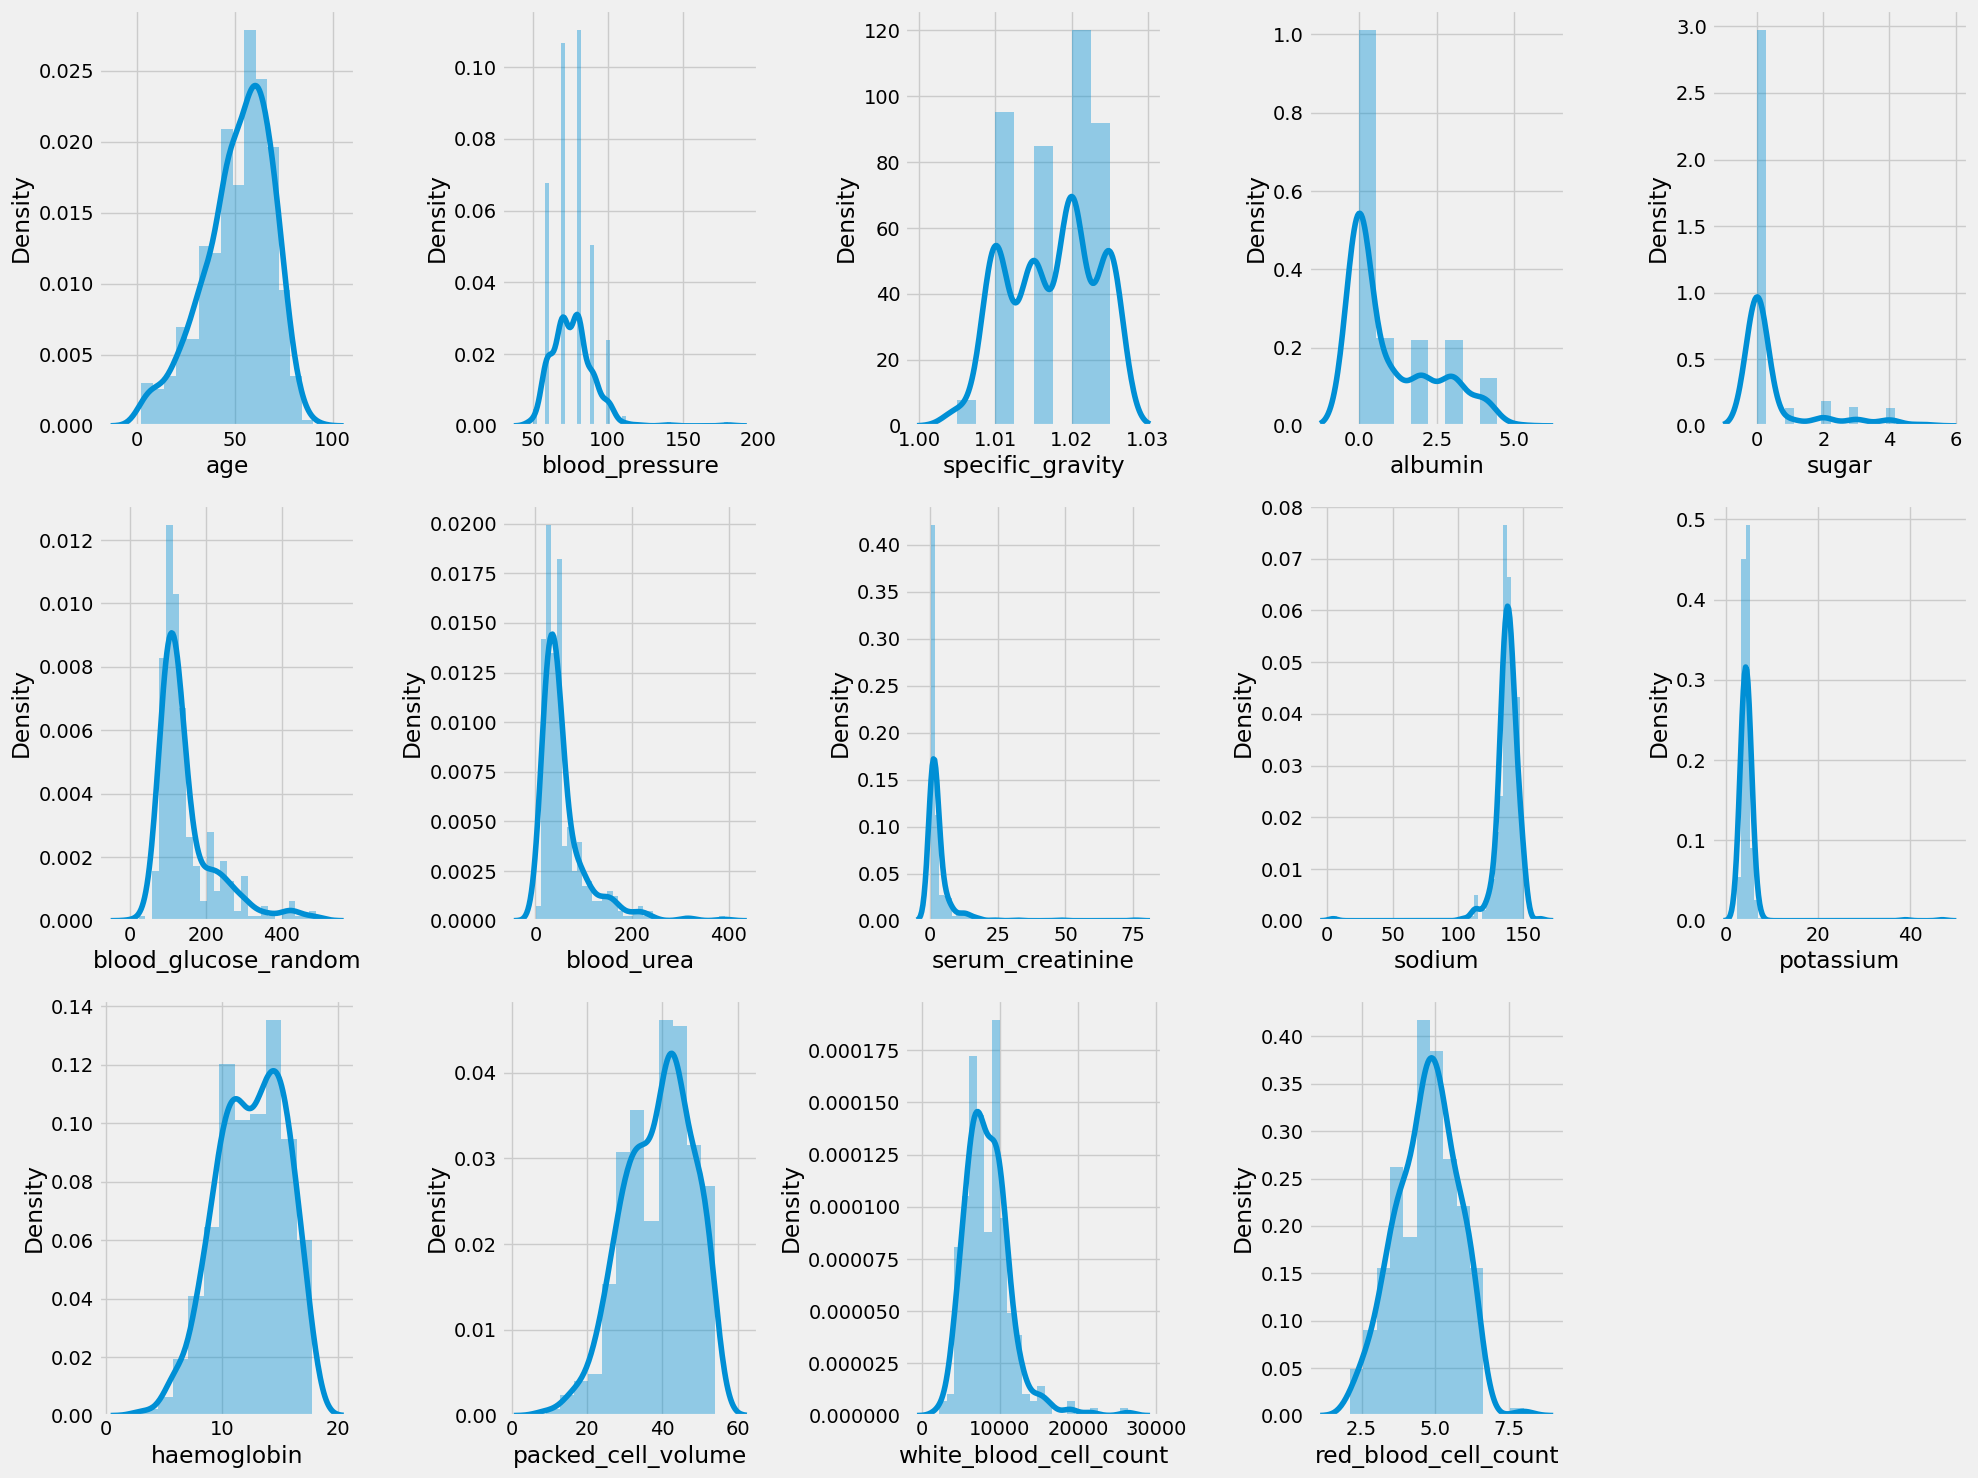

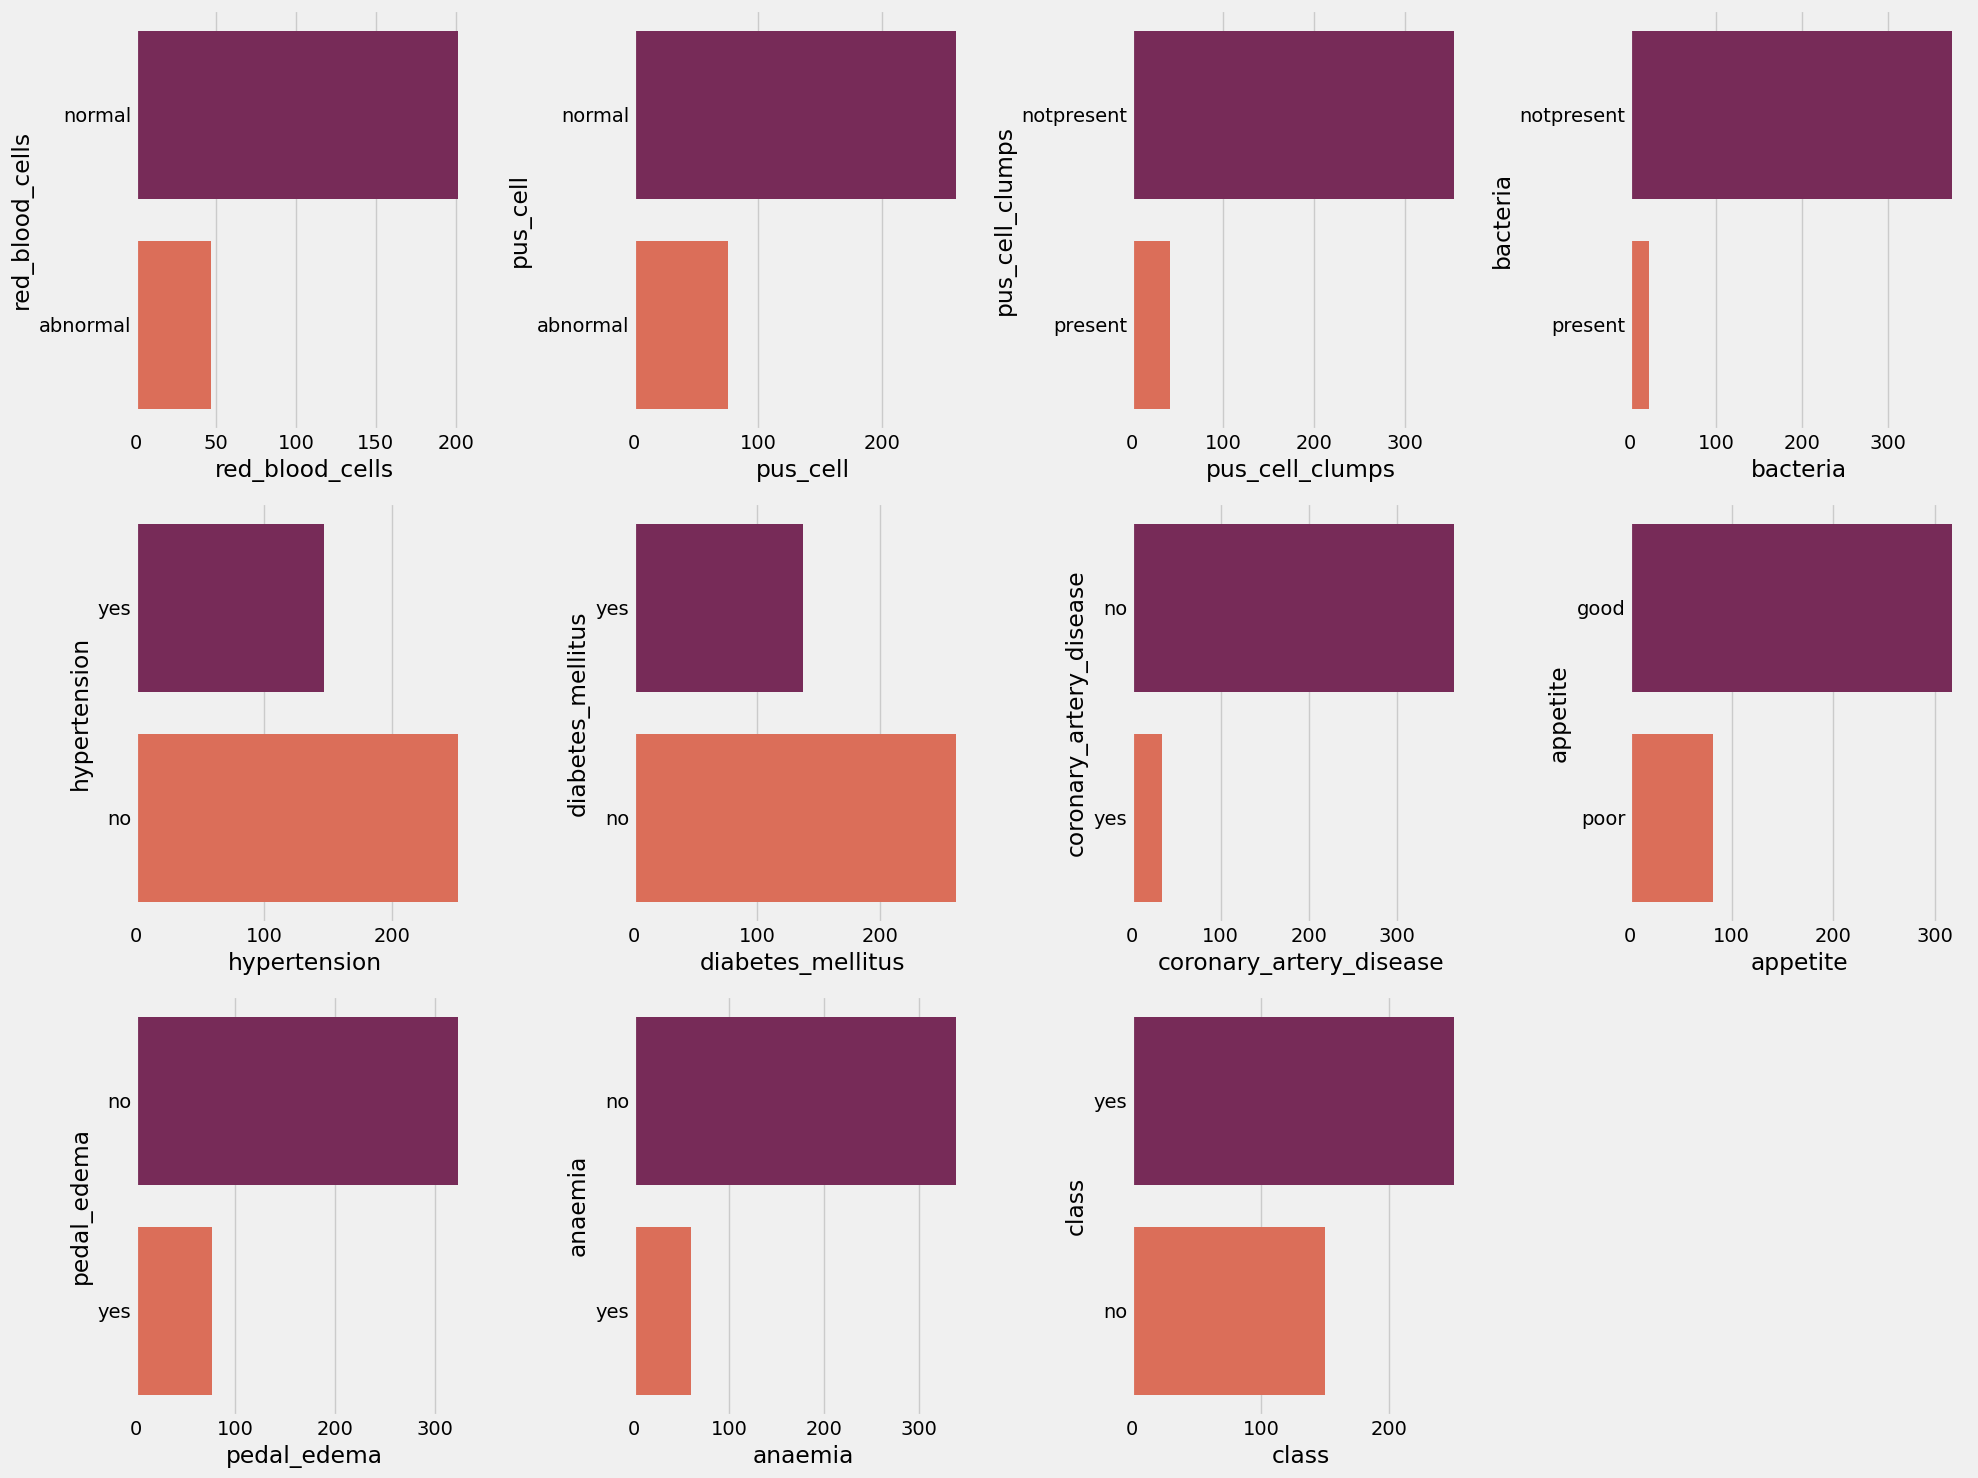

In [52]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

#df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})


df['class'] = df['class'].map({'ckd': "yes", 'notckd': "no", 'ckd\t':"yes"})

#df['class'] = pd.to_numeric(df['class'], errors='coerce')

cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [53]:
df.isna().sum().sort_values(ascending = False)

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

for col in num_cols:
    random_value_imputation(col)

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
print(cat_cols,num_cols)


['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anaemia', 'class'] ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [54]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anaemia has 2 categories

class has 2 categories



,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,142.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,273.0,18.0,0.8,114.0,4.8,11.3,38.0,6000.0,4.9,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,141.0,2.9,9.6,31.0,7500.0,3.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,139.0,3.6,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]
X.drop(['specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count'], axis = 'columns', inplace = True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

scaler=StandardScaler()
X_train['age']=scaler.fit_transform(X_train[['age']])
X_test['age']=scaler.transform(X_test[['age']])
X_train.head()

,age,blood_pressure,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anaemia
92,1.122679,70.0,1,1,1,0,0,0
223,1.122679,90.0,1,1,0,0,0,0
234,-0.801336,100.0,1,0,0,0,0,0
232,-0.065683,90.0,0,0,0,0,1,0
377,0.726558,70.0,0,0,0,0,0,0


In [56]:
#Ada Boost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
ada = AdaBoostClassifier(n_estimators=100,random_state = 42)
ada.fit(X_train, y_train)

print("Ada Boost Model Training Accuracy: ", accuracy_score(y_train, ada.predict(X_train)))
print("Ada Boost Model Test Accuracy: ", accuracy_score(y_test, ada.predict(X_test)))

Ada Boost Model Training Accuracy:  0.9357142857142857
Ada Boost Model Test Accuracy:  0.925


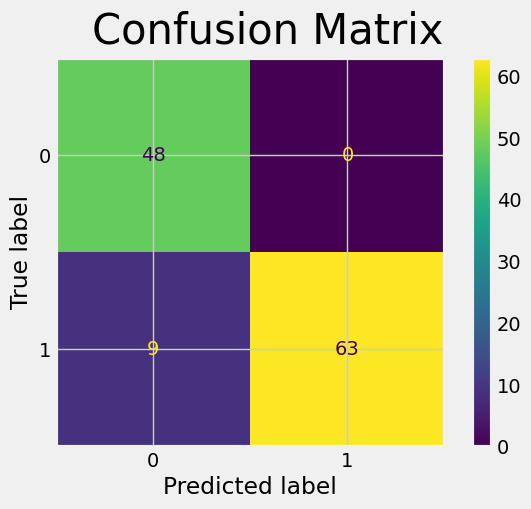

Accuracy:  0.925 
Precision:  1.0 
Sensitivity/recall:  0.875 
Specificity:  1.0 
F1 Score:  0.9333333333333333


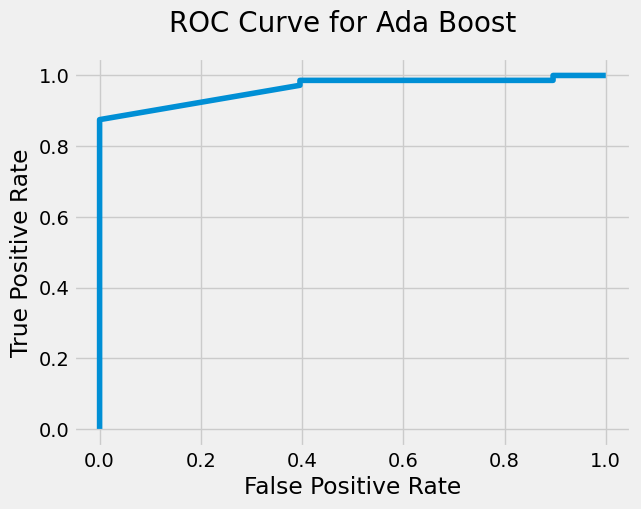

ADA Model AUC score: 0.9628182870370371


In [57]:
#Confusion Matrix -- Determining indicators for the model
predicted = ada.predict(X_test)
actual = y_test
#print(actual, predicted)

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.suptitle("Confusion Matrix",fontsize=30)
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print("Accuracy: ", Accuracy,"\nPrecision: ", Precision, "\nSensitivity/recall: ", Sensitivity_recall, "\nSpecificity: ", Specificity, "\nF1 Score: ", F1_score)

#ROC&AUC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

predictproba = ada.predict_proba(X_test)

enterproba = []
for i in predictproba:
    enterproba.append(i[1])
#print(enterproba)

def plt_roc(T_y, P_y):
    fpr, tpr, thresholds = roc_curve(T_y, P_y)
    plt.plot(fpr, tpr)
    plt.suptitle("ROC Curve for Ada Boost",fontsize=20)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt_roc(y_test, enterproba)
plt.show()
print(f'ADA Model AUC score: {roc_auc_score(y_test, enterproba)}')

In [58]:
#Cross Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score

#Stratified K-Fold
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(ada, X, y, cv = sk_folds)
print("SK-Fold\nCross Validation Scores: ", scores , "\nAverage Cross Validation Score: ", scores.mean() , "\nNumber of Cross Validation Scores used in Average: ", len(scores))
print("---------------------------------------------")

SK-Fold
Cross Validation Scores:  [0.9375 0.9625 0.8625 0.9    0.9   ] 
Average Cross Validation Score:  0.9125 
Number of Cross Validation Scores used in Average:  5
---------------------------------------------


In [59]:
#Extra trees model
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier()
extc.fit(X_train, y_train)


print("Extra Trees Classifier Training Accuracy: ",accuracy_score(y_train, extc.predict(X_train)))
print("Extra Trees Classifier Testing Accuracy: ",accuracy_score(y_test, extc.predict(X_test)))

Extra Trees Classifier Training Accuracy:  0.9785714285714285
Extra Trees Classifier Testing Accuracy:  0.8916666666666667


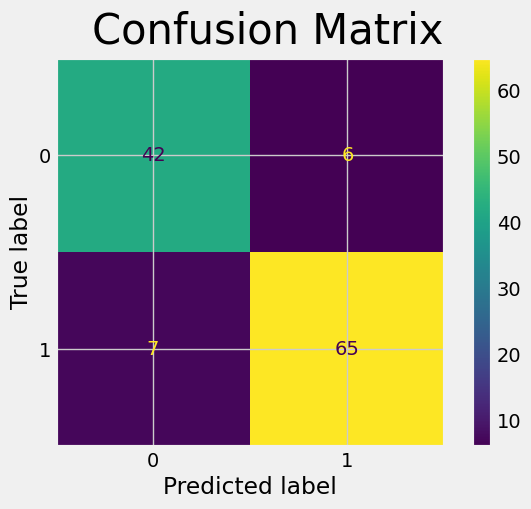

Accuracy:  0.8916666666666667 
Precision:  0.9154929577464789 
Sensitivity/recall:  0.9027777777777778 
Specificity:  0.875 
F1 Score:  0.9090909090909091


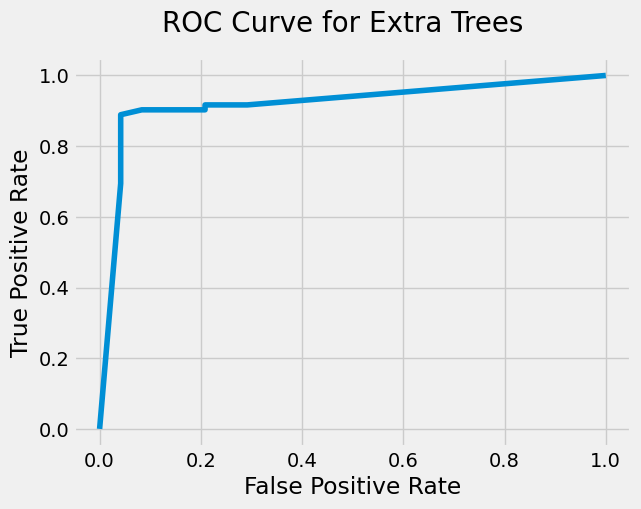

Extra Trees Model AUC score: 0.9198495370370369


In [60]:
#Confusion Matrix
predicted = extc.predict(X_test)
actual = y_test

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.suptitle("Confusion Matrix",fontsize=30)
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print("Accuracy: ", Accuracy,"\nPrecision: ", Precision, "\nSensitivity/recall: ", Sensitivity_recall, "\nSpecificity: ", Specificity, "\nF1 Score: ", F1_score)

#ROC&AUC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

predictproba = extc.predict_proba(X_test)

enterproba = []
for i in predictproba:
    enterproba.append(i[1])
#print(enterproba)

def plt_roc(T_y, P_y):
    fpr, tpr, thresholds = roc_curve(T_y, P_y)
    plt.plot(fpr, tpr)
    plt.suptitle("ROC Curve for Extra Trees",fontsize=20)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt_roc(y_test, enterproba)
plt.show()
print(f'Extra Trees Model AUC score: {roc_auc_score(y_test, enterproba)}')

In [61]:
#Cross Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score

#Stratified K-Fold
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(extc, X, y, cv = sk_folds)
print("SK-Fold\nCross Validation Scores: ", scores , "\nAverage Cross Validation Score: ", scores.mean() , "\nNumber of Cross Validation Scores used in Average: ", len(scores))
print("---------------------------------------------")

SK-Fold
Cross Validation Scores:  [0.9375 0.9125 0.8875 0.9125 0.875 ] 
Average Cross Validation Score:  0.905 
Number of Cross Validation Scores used in Average:  5
---------------------------------------------


In [62]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

print("Decision Tree Classifier Training Accuracy: ",accuracy_score(y_train, dtc.predict(X_train)))
print("Decision Tree Classifier Testing Accuracy: ", accuracy_score(y_test, dtc.predict(X_test)))

Decision Tree Classifier Training Accuracy:  0.9785714285714285
Decision Tree Classifier Testing Accuracy:  0.8916666666666667


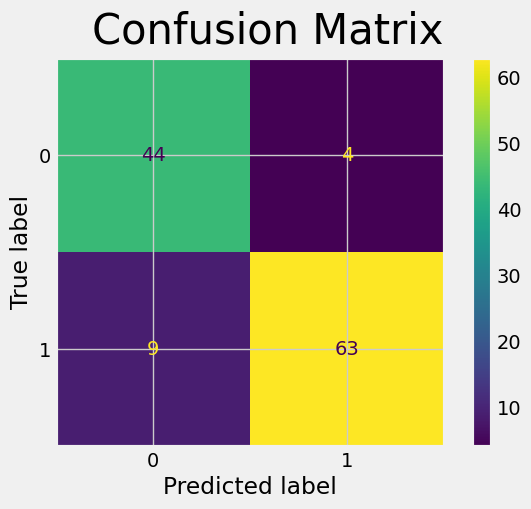

Accuracy:  0.8916666666666667 
Precision:  0.9402985074626866 
Sensitivity/recall:  0.875 
Specificity:  0.9166666666666666 
F1 Score:  0.9064748201438849


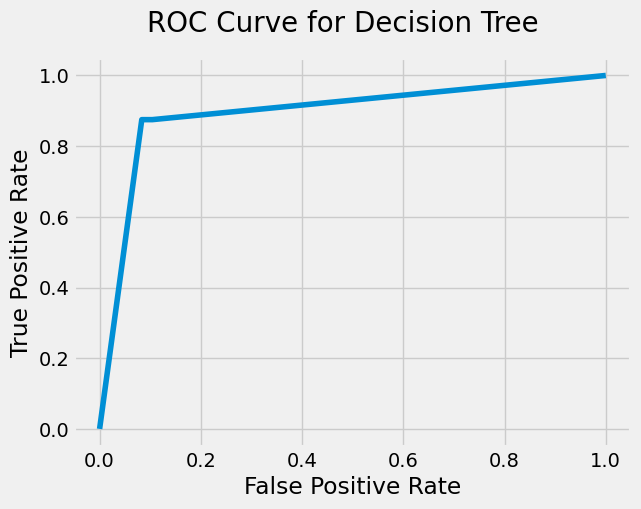

Decision Tree Model AUC score: 0.89453125


In [63]:
#Confusion Matrix
predicted = dtc.predict(X_test)
actual = y_test

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.suptitle("Confusion Matrix",fontsize=30)
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print("Accuracy: ", Accuracy,"\nPrecision: ", Precision, "\nSensitivity/recall: ", Sensitivity_recall, "\nSpecificity: ", Specificity, "\nF1 Score: ", F1_score)

#ROC&AUC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

predictproba = dtc.predict_proba(X_test)

enterproba = []
for i in predictproba:
    enterproba.append(i[1])
#print(enterproba)

def plt_roc(T_y, P_y):
    fpr, tpr, thresholds = roc_curve(T_y, P_y)
    plt.plot(fpr, tpr)
    plt.suptitle("ROC Curve for Decision Tree",fontsize=20)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt_roc(y_test, enterproba)
plt.show()
print(f'Decision Tree Model AUC score: {roc_auc_score(y_test, enterproba)}')

In [64]:
#Cross Validation

from sklearn.model_selection import StratifiedKFold, cross_val_score

#Stratified K-Fold
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(dtc, X, y, cv = sk_folds)
print("SK-Fold\nCross Validation Scores: ", scores , "\nAverage Cross Validation Score: ", scores.mean() , "\nNumber of Cross Validation Scores used in Average: ", len(scores))
print("---------------------------------------------")

SK-Fold
Cross Validation Scores:  [0.925  0.9125 0.8875 0.9    0.875 ] 
Average Cross Validation Score:  0.9 
Number of Cross Validation Scores used in Average:  5
---------------------------------------------
